# HackerRank Survey Data

## Overview

#### Gender Breakdown

#### Country Rankings

#### Age and Years of Coding Experience

#### Education

#### Industry

#### Job Level

#### Hiring Managers

In [248]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas.tools.plotting
import seaborn as sns
import matplotlib

# Install "fuzzywuzzy" and "python-Levenshtein" using pip install
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
%matplotlib inline

plt.style.use('seaborn')

# Install "plotly"
import plotly.offline as offline
offline.init_notebook_mode()
import plotly.graph_objs as go
plt.style.use('ggplot')
pd.options.display.max_rows =300
plt.rc('ytick',labelsize=12)
plt.rc('ytick',labelsize=12)
plt.rc('axes',labelsize=12)

In [249]:
root = 'c:\\Users\michael.madaio'
path = "\Documents\EQUALS\HackerRank Developer Survey"
os.chdir(root + path)
print(os.getcwd())

c:\Users\michael.madaio\Documents\EQUALS\HackerRank Developer Survey


In [250]:
codebook = pd.read_csv('HackerRank-Developer-Survey-2018-Codebook.csv')
numeric_mapping = pd.read_csv('HackerRank-Developer-Survey-2018-Numeric-Mapping.csv')
numeric = pd.read_csv('HackerRank-Developer-Survey-2018-Numeric.csv', na_values=['#NULL!', 'nan'], low_memory=False)
values = pd.read_csv('HackerRank-Developer-Survey-2018-Values.csv', na_values=['#NULL!', 'nan'], low_memory=False)
country_mapping = pd.read_csv('Country-Region-Mapping.csv',encoding='latin-1')

### Example Data

In [251]:
values.head()

RespondentID       StartDate         EndDate CountryNumeric2  \
0    6464453728  10/19/17 11:51  10/20/17 12:05     South Korea   
1    6478031510   10/26/17 6:18   10/26/17 7:49         Ukraine   
2    6464392829  10/19/17 10:44  10/19/17 10:56        Malaysia   
3    6481629912   10/27/17 1:51   10/27/17 2:05         Curaçao   
4    6488385057  10/31/17 11:46  10/31/17 11:59             NaN   

    q1AgeBeginCoding              q2Age q3Gender  \
0  16 - 20 years old  18 - 24 years old   Female   
1  16 - 20 years old  25 - 34 years old     Male   
2  11 - 15 years old  12 - 18 years old   Female   
3  11 - 15 years old  12 - 18 years old     Male   
4  16 - 20 years old  25 - 34 years old   Female   

                           q4Education q0004_other  \
0                         Some college         NaN   
1  Post graduate degree (Masters, PhD)         NaN   
2                         Some college         NaN   
3                     College graduate         NaN   
4                     College graduate         NaN   

                                       q5DegreeFocus    ...     \
0                                   Computer Science    ...      
1  Other STEM (science, technology, engineering, ...    ...      
2  Other STEM (science, technology, engineering, ...    ...      
3                                   Computer Science    ...      
4                                                NaN    ...      

        q30LearnCodeOther                         q0030_other   q31Level3  \
0  Other (please specify)                            datacamp  num%2 == 0   
1                     NaN                                 NaN  num%2 == 0   
2                     NaN                                 NaN  num%2 == 0   
3                     NaN                                 NaN  num%2 == 0   
4  Other (please specify)  Blogs/articles by industry leaders  num%2 == 0   

  q32RecommendHackerRank q0032_other q33HackerRankChallforJob q34PositiveExp  \
0                    Yes         NaN                       No            NaN   
1                    Yes         NaN                       No            NaN   
2                    Yes         NaN                       No            NaN   
3                    Yes         NaN                       No            NaN   
4                    Yes         NaN                       No            NaN   

  q34IdealLengHackerRankTest q0035_other q36Level4  
0                        NaN         NaN     Queue  
1                        NaN         NaN     Queue  
2                        NaN         NaN     Queue  
3                        NaN         NaN   Hashmap  
4                        NaN         NaN   Hashmap  

[5 rows x 251 columns]

In [252]:
codebook.columns = ['fieldname', 'question', 'notes']
codebook.set_index('fieldname', inplace=True);
numeric_mapping.set_index('Data Field', inplace=True)

In [253]:
numeric.q1AgeBeginCoding = numeric.q1AgeBeginCoding.astype(float)
numeric.q2Age = numeric.q2Age.astype(float)
numeric = numeric.fillna(-1)

values = values.fillna('Not provided')

In [254]:
## Test Fuzzy String matching for country name joining


names_array=[]
ratio_array=[]
def match_names(wrong_names,correct_names):
    for row in wrong_names:
        x=process.extractOne(row, correct_names)
        names_array.append(x[0])
        ratio_array.append(x[1])
    return names_array,ratio_array
 
#Input country names from survey dataset
survey_names=values['CountryNumeric2'].dropna().unique()
#print(survey_names)

#Correct country names dataset
correct_names=country_mapping['name'].values
 
# Only need to run this line once:    
# name_match,ratio_match=match_names(survey_names,correct_names)
# print(len(name_match))
# print(values['CountryNumeric2'].dropna().unique())


#np.savetxt("fixed_country_names.csv", name_match, delimiter=",", fmt='%s')
      
fixed = pd.read_csv("fixed_country_names.csv",header=None,encoding="ISO-8859-1")
      
#print(len(fixed))

d = {'New':fixed[0],'Old':survey_names}
cross_ref =pd.DataFrame(d)

# Replace survey dataset country names with correct country names. 

values = values.join(cross_ref.set_index('Old'), on='CountryNumeric2')
values = values.rename(index=str, columns={"New": "CountryName"})



In [255]:
# Join region labels to survey data by country name

values = values.join(country_mapping.set_index('name'), on='CountryName')
#print(country_mapping)


### Respondents' Gender Breakdown

In [256]:
print(values["q3Gender"].value_counts())

Male            20774
Female           4122
Non-Binary        125
Not provided       69
Name: q3Gender, dtype: int64


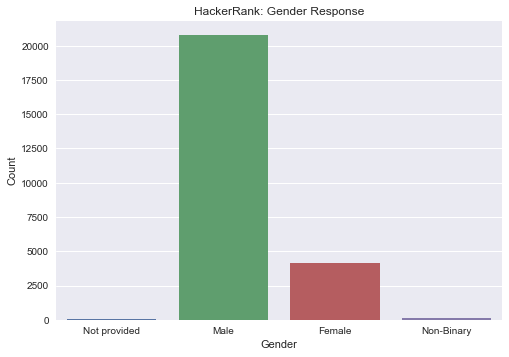

In [257]:
# Gender Count

sns.set(font_scale=1)
count = sns.countplot(x='q3Gender', data=numeric)
count.set_xticklabels(np.append(['Not provided'], numeric_mapping.loc['q3Gender'].values[:, 1]));
count.set_xlabel('Gender')
count.set_ylabel('Count')
count.set_title("HackerRank: Gender Response")


fig = count.get_figure()
fig.savefig('HR_gender_barplot.jpg')
print("")

In [258]:
# Clean country data and find gender ratio

# Only use countries with > 50 respondents
threshold = 50

counts = values["CountryName"].value_counts()
country_min = values.loc[values["CountryName"].isin(counts[counts > threshold].index), :]


# Calculate female/male ratio
female = country_min[country_min['q3Gender'] == 'Female']['CountryName'].value_counts()
male = country_min[country_min['q3Gender'] == 'Male']['CountryName'].value_counts()

female_share = female/(female+male).dropna()


In [259]:
# Drop respondents that didn't provide gender
values = values[values["q3Gender"] != "Not provided"]

#### Total number of countries

In [260]:
len(values["CountryName"].value_counts())

147

#### Number of countries with more than 50 respondents

In [261]:
len(country_min["CountryName"].value_counts())

47

### Countries Ranked by Total Respondents

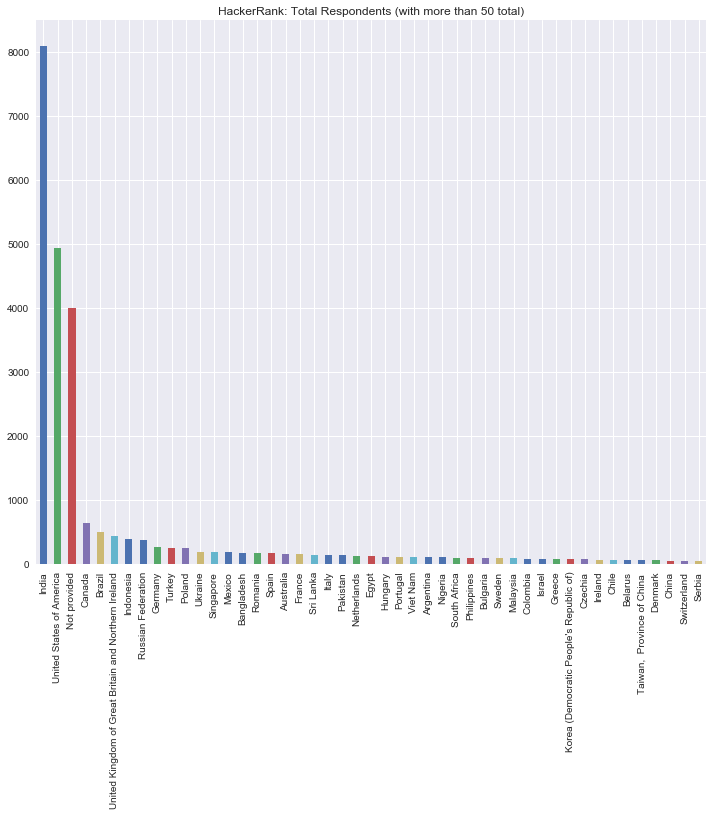

In [262]:
country_total = country_min['CountryName'].value_counts().plot(kind='bar',figsize=(12,10), title="HackerRank: Total Respondents (with more than 50 total)")


fig = country_total.get_figure()
fig.savefig('HR_countries_total-min50_barplot.jpg')

### Countries Ranked by Percent Female

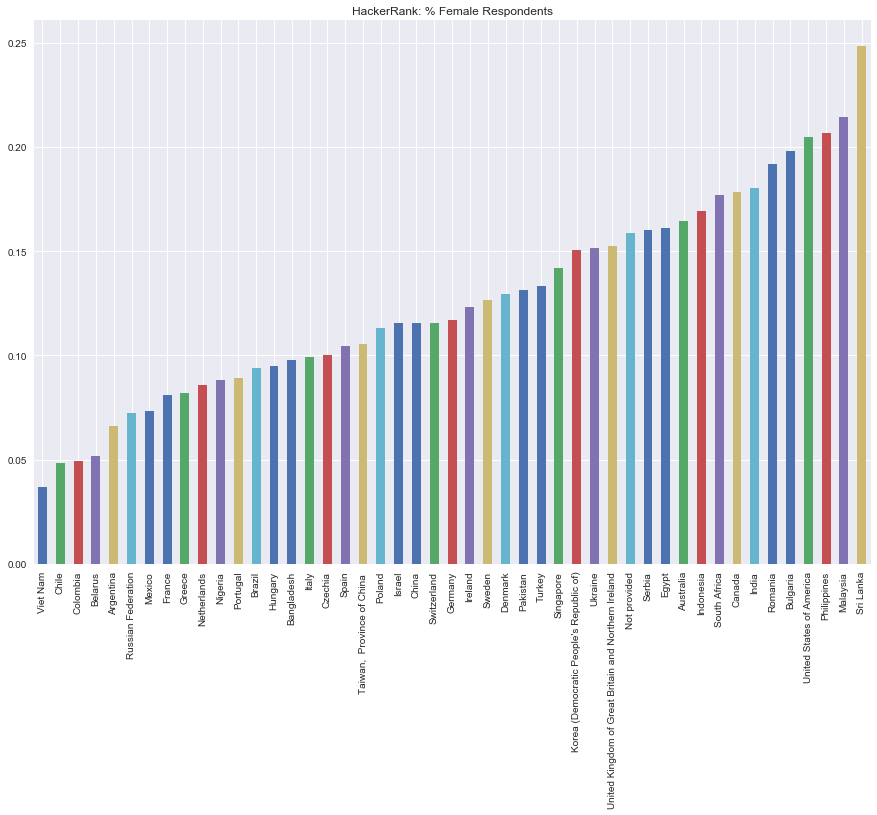

In [263]:
plt.xticks(rotation=90)
female_share_countries = female_share.sort_values().plot(kind='bar',figsize=(15,10), title="HackerRank: % Female Respondents")


fig = female_share_countries.get_figure()
fig.savefig('HR_countries_female-share_barplot.jpg')

### Regional Total Respondents

Asia        10189
Americas     6668
Europe       3385
Africa        479
Oceania       204
Name: region, dtype: int64



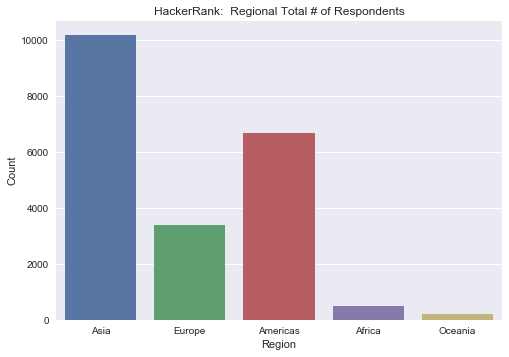

In [264]:
# Regional Count

#print(values['CountryNumeric2'].value_counts())
print(values['region'].value_counts())

sns.set(font_scale=1)
count = sns.countplot(x='region', data=values)
count.set_xlabel('Region')
count.set_ylabel('Count')
count.set_title("HackerRank:  Regional Total # of Respondents")

fig = count.get_figure()
fig.savefig('HR_regional_total_barplot.jpg')
print("")

In [265]:
## Before mapping, only use respondents that listed a country

only_names = values[(values["CountryName"]!= "Not provided") & (values["CountryName"]!= "Asia/Pacific Region") & (values["CountryName"]!= "Europe")]



## Maps

#### Map of Total # of Respondents

In [290]:
# Visualize by country

country = only_names['CountryName'].value_counts()
#print(country)

# plotly 
data = [dict(
    type ='choropleth',
    locations = country.index,
    locationmode ='country names',
    z = country.values,
    text = ('Count'+'<br>'),
    colorscale=[[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
    reversescale=True,
    marker=dict(line=dict(color='rgb(180,180,180)', width=0.5)),
    
    colorbar = dict(title ='HackerRank: Total Respondents by Country')
    )]

layout = dict(title = 'Number of respondents by country',
             geo = dict( showframe= False,
                       projection = dict(type = 'Mercator')))
fig = dict(data=data, layout=layout)
offline.plot(fig, filename= "HR_female_total.html", image_filename="HR_female_total",image='png')
print("Open this map: HR_female_total.png")

Open this map: HR_female_total.png


#### Map of Percent Female Respondents by Country (above 50 respondents)

In [267]:
### Map of Percent Female Respondents by Country

# plotly 
data = [dict(
    type ='choropleth',
    locations = female_share.index,
    locationmode ='country names',
    z = female_share.values,
    text = '% female',
    colorscale=[[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
    reversescale=True,
    marker=dict(line=dict(color='rgb(180,180,180)', width=0.5)),
    colorbar = dict(title ='Response count')
    )]
layout = dict(title = 'HackerRank: Percent Female Response by Country',
             geo = dict( showframe= False,
                       showcoastlines=True,
                       projection = dict(type = 'Mercator')))
fig = dict(data=data, layout=layout)
offline.plot(fig, filename= "HR_female_percent.html", image_filename="HR_female_percent",image='png')
print("Open this map: HR_female_percent.png")

Open this map: HR_female_percent.png


In [268]:
# Create new Dataframes for each region 

asia = values[values["region"] == "Asia"]
americas  = values[values["region"] == "Americas"]
europe  = values[values["region"] == "Europe"]
africa  = values[values["region"] == "Africa"]
oceania  = values[values["region"] == "Oceania"]


In [269]:
# Create new Dataframes for each Country case study 

indonesia = values[values["CountryName"] == "Indonesia"]
argentina  = values[values["CountryName"] == "Argentina"]
south_africa  = values[values["CountryName"] == "South Africa"]
pakistan  = values[values["CountryName"] == "Pakistan"]

## Age and Years of Coding

In [270]:
# Function for drawing heatmaps

def draw_heatmap(column1, column2, title=None, annot=True, ax=None, size=(10, 10), data=values):
    cross = pd.crosstab(data[column1], data[column2], normalize="columns")
    
    if ax is None:
        f, ax = plt.subplots(figsize=size)
        
    sns.heatmap(cross, cmap='Reds', fmt='g', annot=annot, ax=ax)
#    ax.set_ylabel(codebook.loc[column1]['question'])
    ax.set_xlabel(codebook.loc[column2]['question'])
    
    if title is not None:
        ax.set_title(title)

In [271]:
# Fix age category data

# We need to shift NaN to 0, because data starts from value 1
numeric.loc[numeric['q1AgeBeginCoding'] == -1, 'q1AgeBeginCoding'] = 0
numeric.loc[numeric['q2Age'] == -1, 'q2Age'] = 0

# And to trim text so that it fits plots
numeric_mapping.loc['q2Age'] = [[i+1, j] for i, j in zip(range(9), ['Under 12', '12 - 18', '18 - 24', '25 - 34', '35 - 44', '45 - 54', '55 - 64', '65 - 74', '75+'])]

# Re-sort q1AgeBeginCoding list
#print(numeric_mapping.loc['q1AgeBeginCoding'])
#numeric_mapping.loc['q1AgeBeginCoding'] = pd.Categorical(numeric_mapping.loc['q1AgeBeginCoding'], ['5 - 10', '11 - 15', '16 - 20', '21 - 25', '26 - 30', '31 - 35', '36 - 40', '41 - 50'])

numeric_mapping.loc['q1AgeBeginCoding'] = numeric_mapping.loc['q1AgeBeginCoding'].applymap(lambda x: str(x).replace('years old', ''))



In [272]:
## Create male/female dataframes, for heatmapping

women = values[values["q3Gender"]=="Female"]
men = values[values["q3Gender"]=="Male"]

### Age and Years of Coding, by Gender

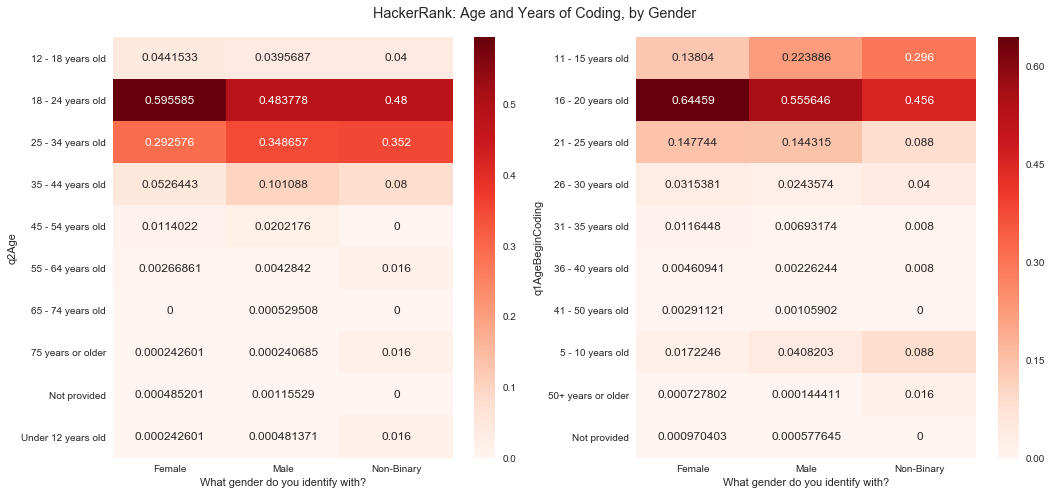

In [273]:
# Age and Age Started Coding

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,7))

sns.set()
draw_heatmap('q2Age', 'q3Gender', ax=ax[0], annot=True, data=values)
draw_heatmap('q1AgeBeginCoding', 'q3Gender', ax=ax[1], annot=True, data=values)

fig.suptitle("HackerRank: Age and Years of Coding, by Gender")

fig.tight_layout() 
plt.subplots_adjust(top=0.92)

plt.savefig('HR_age_years-coding_gender.jpg')

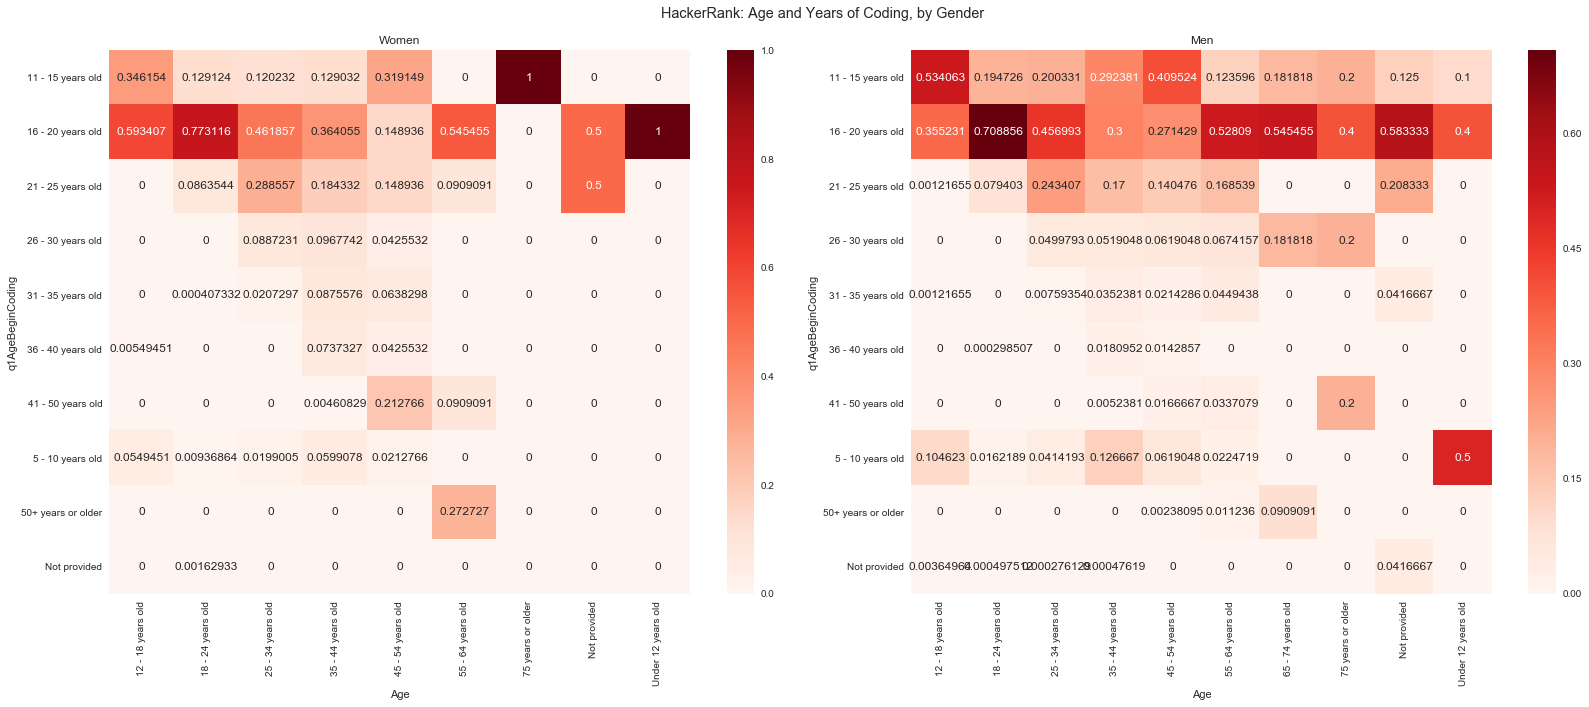

In [274]:
# Age and Age Started Coding, by Gender

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(23,10))
fig.suptitle("HackerRank: Age and Years of Coding, by Gender")

sns.set()

draw_heatmap('q1AgeBeginCoding', 'q2Age', ax=ax[0], annot=True, data=women)
ax[0].set_xlabel("Age")
ax[0].set_ylabel("q1AgeBeginCoding")
ax[0].set_title('Women')

draw_heatmap('q1AgeBeginCoding', 'q2Age', ax=ax[1], annot=True, data=men)
ax[1].set_xlabel("Age")
ax[1].set_ylabel("q1AgeBeginCoding")
ax[1].set_title('Men')


fig.tight_layout() 
plt.subplots_adjust(top=0.92)

plt.savefig('HR_age_years-coding_gender_combined.jpg')

### TODO: Add Age and Years of Coding, by Region

## Education

### Education, by Gender

Q: What is the highest level of education you have (or plan to obtain)? 



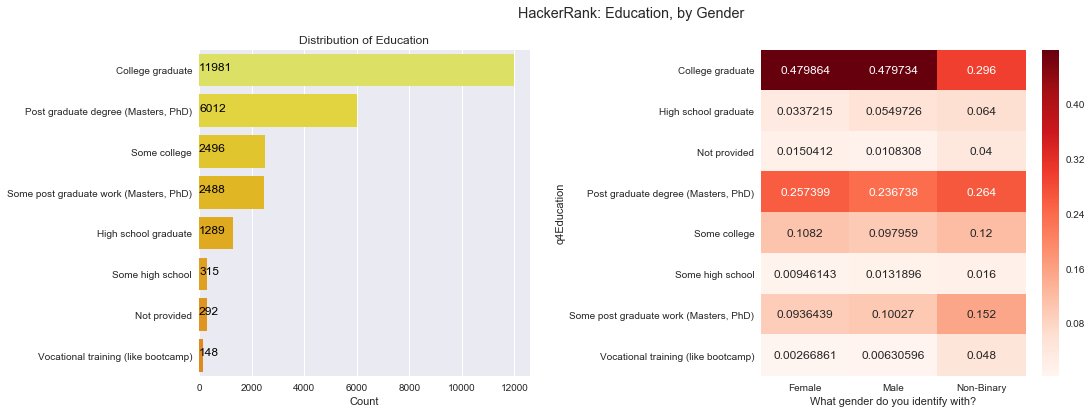

In [275]:
# Education level

print('Q:',codebook.loc['q4Education']['question'],"\n")

f,ax = plt.subplots(1,2, figsize=(16,6))



st_age = values['q4Education'].value_counts()
sns.barplot(st_age.values, st_age.index, palette='Wistia',ax=ax[0])
ax[0].set_title('Distribution of Education')
ax[0].set_xlabel('Count')
for i, v in enumerate(st_age.values):
    ax[0].text(0.8,i,v,color='k',fontsize=12)

    
sns.set()
draw_heatmap('q4Education', 'q3Gender', ax=ax[1], annot=True)


plt.subplots_adjust(wspace=0.7)

plt.suptitle("HackerRank: Education, by Gender")


plt.savefig('HR_education_gender.jpg')



### Education, by Gender and Region

Q: What is the highest level of education you have (or plan to obtain)? 



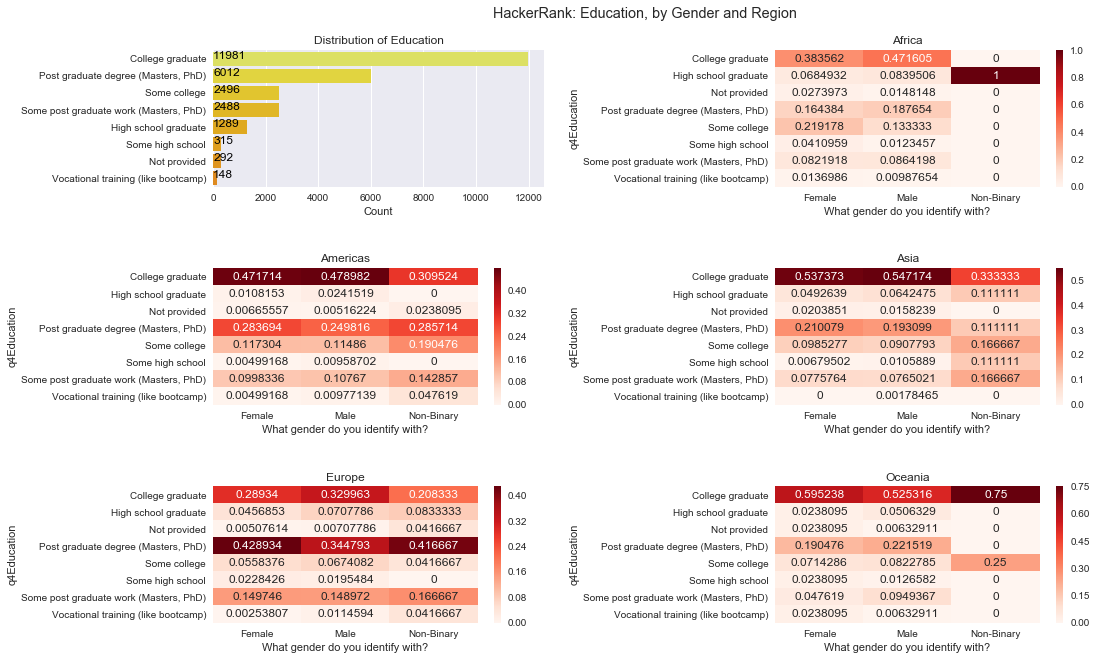

In [276]:
# Education level

print('Q:',codebook.loc['q4Education']['question'],"\n")

f,ax = plt.subplots(3,2, figsize=(16,10))


st_age = values['q4Education'].value_counts()
sns.barplot(st_age.values, st_age.index, palette='Wistia',ax=ax[0][0])
ax[0][0].set_title('Distribution of Education')
ax[0][0].set_xlabel('Count')
for i, v in enumerate(st_age.values):
    ax[0][0].text(0.8,i,v,color='k',fontsize=12)

    
sns.set()
draw_heatmap('q4Education', 'q3Gender', ax=ax[0][1], annot=True, data=africa)
ax[0][1].set_title('Africa')

sns.set()
draw_heatmap('q4Education', 'q3Gender', ax=ax[1][0], annot=True, data=americas)
ax[1][0].set_title('Americas')

sns.set()
draw_heatmap('q4Education', 'q3Gender', ax=ax[1][1], annot=True, data=asia)
ax[1][1].set_title('Asia')

sns.set()
draw_heatmap('q4Education', 'q3Gender', ax=ax[2][0], annot=True, data=europe)
ax[2][0].set_title('Europe')

sns.set()
draw_heatmap('q4Education', 'q3Gender', ax=ax[2][1], annot=True, data=oceania)
ax[2][1].set_title('Oceania')

plt.subplots_adjust(hspace=0.6, wspace=0.7, top=0.92)


plt.suptitle("HackerRank: Education, by Gender and Region")
plt.savefig('HR_education_gender_region.jpg')

### Total respondents for 4 Countries

In [277]:
print("Argentina:", len(argentina), "\nIndonesia:", len(indonesia), "\nSouth Africa:", len(south_africa), "\nPakistan", len(pakistan))

Argentina: 106 
Indonesia: 386 
South Africa: 96 
Pakistan 138


### Education, by Gender, for 4 Countries

Q: What is the highest level of education you have (or plan to obtain)? 



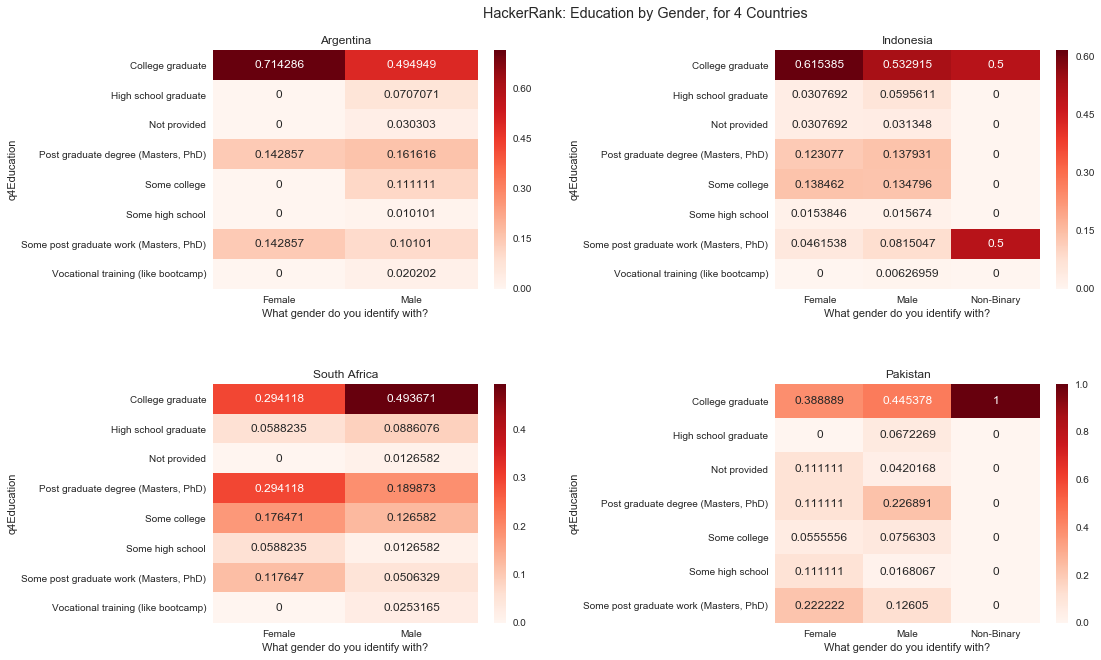

In [278]:
# Education level

print('Q:',codebook.loc['q4Education']['question'],"\n")

f,ax = plt.subplots(2,2, figsize=(16,10))

question = 'q4Education'

sns.set()
draw_heatmap(question, 'q3Gender', ax=ax[0][0], annot=True, data=argentina)
ax[0][0].set_title('Argentina')

sns.set()
draw_heatmap(question, 'q3Gender', ax=ax[0][1], annot=True, data=indonesia)
ax[0][1].set_title('Indonesia')

sns.set()
draw_heatmap(question, 'q3Gender', ax=ax[1][0], annot=True, data=south_africa)
ax[1][0].set_title('South Africa')

sns.set()
draw_heatmap(question, 'q3Gender', ax=ax[1][1], annot=True, data=pakistan)
ax[1][1].set_title('Pakistan')



plt.suptitle("HackerRank: Education by Gender, for 4 Countries")

plt.subplots_adjust(hspace=0.4, wspace=0.7, top=0.92)
plt.savefig('HR_education_gender_4countries.jpg')

## Industry

### Industry, by Gender

Q: Which best describes the industry you work in? 



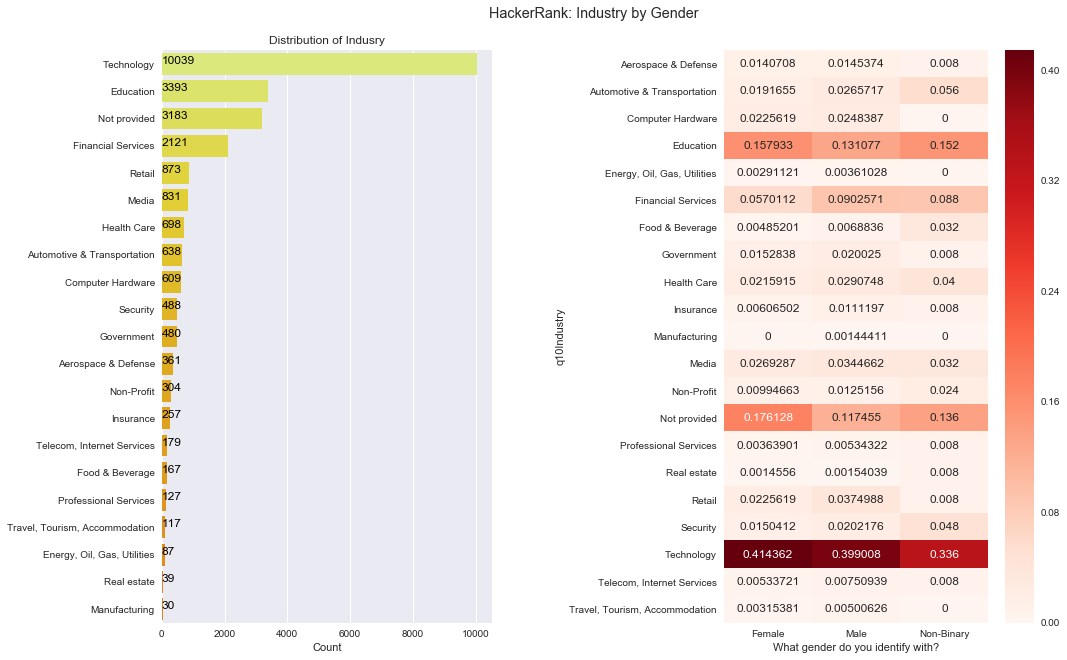

In [279]:
# Industry

print('Q:',codebook.loc['q10Industry']['question'],"\n")

f,ax = plt.subplots(1,2,figsize=(16,10))
ind = values['q10Industry'].value_counts()
sns.barplot(ind.values, ind.index, palette='Wistia',ax=ax[0])
ax[0].set_title('Distribution of Indusry')
ax[0].set_xlabel('Count')
for i, v in enumerate(ind.values):
    ax[0].text(0.8,i,v,color='k',fontsize=12)
    

sns.set()
draw_heatmap('q10Industry', 'q3Gender', ax=ax[1], annot=True)
plt.subplots_adjust(wspace=0.7, top=0.92);

plt.suptitle("HackerRank: Industry by Gender")
plt.savefig('HR_industry_gender.jpg')

### Industry, by Gender and Region

Q: Which best describes the industry you work in? 



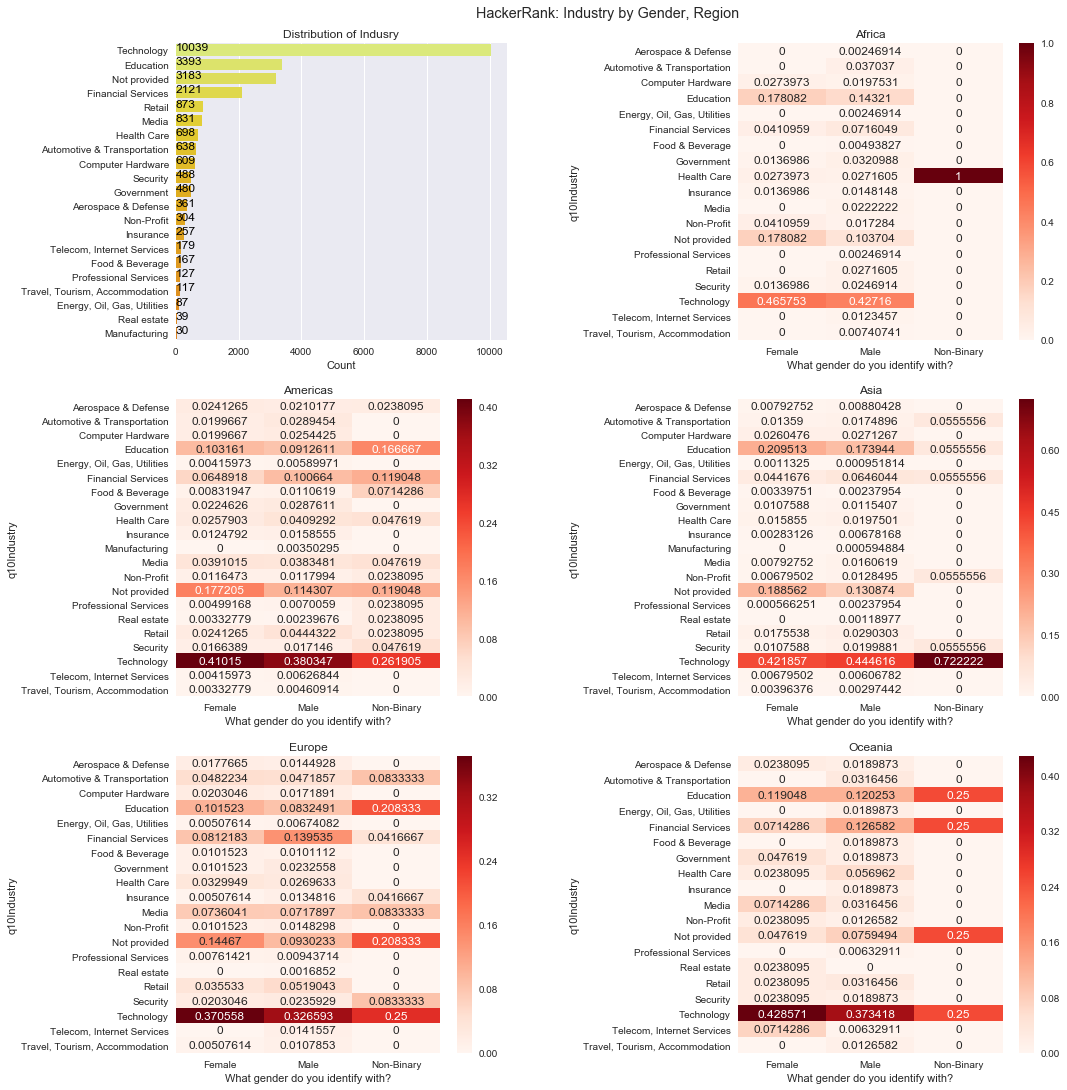

In [280]:
# Industry

print('Q:',codebook.loc['q10Industry']['question'],"\n")

f,ax = plt.subplots(3,2,figsize=(16,17))


ind = values['q10Industry'].value_counts()
sns.barplot(ind.values, ind.index, palette='Wistia',ax=ax[0][0])
ax[0][0].set_title('Distribution of Indusry')
ax[0][0].set_xlabel('Count')
for i, v in enumerate(ind.values):
    ax[0][0].text(0.8,i,v,color='k',fontsize=12)
    
question = 'q10Industry'

sns.set()
draw_heatmap(question, 'q3Gender', ax=ax[0][1], annot=True, data=africa)
ax[0][1].set_title('Africa')

sns.set()
draw_heatmap(question, 'q3Gender', ax=ax[1][0], annot=True, data=americas)
ax[1][0].set_title('Americas')

sns.set()
draw_heatmap(question, 'q3Gender', ax=ax[1][1], annot=True, data=asia)
ax[1][1].set_title('Asia')

sns.set()
draw_heatmap(question, 'q3Gender', ax=ax[2][0], annot=True, data=europe)
ax[2][0].set_title('Europe')

sns.set()
draw_heatmap(question, 'q3Gender', ax=ax[2][1], annot=True, data=oceania)
ax[2][1].set_title('Oceania')


plt.subplots_adjust(wspace=0.7, top=0.95);

plt.suptitle("HackerRank: Industry by Gender, Region")
plt.savefig('HR_industry_gender_region.jpg')

### Industry, by Gender, for 4 Countries

Q: Which best describes the industry you work in? 



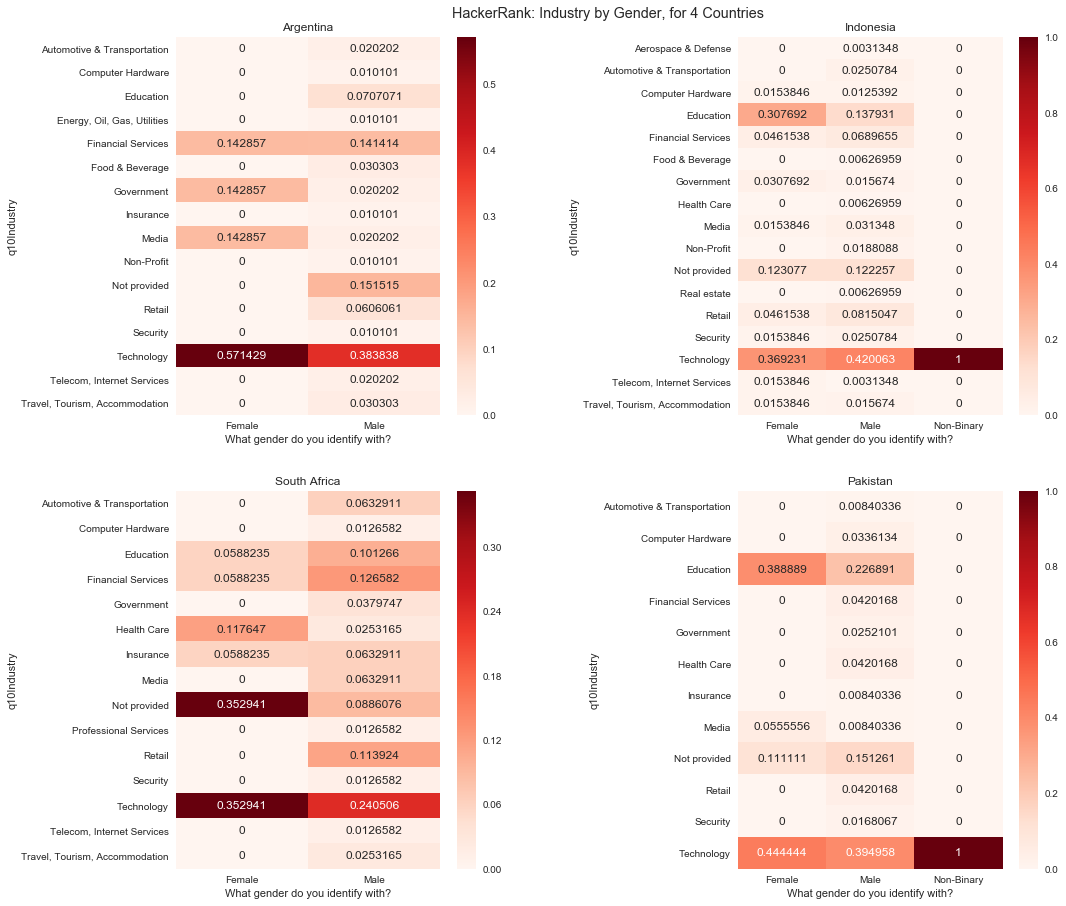

In [281]:
# Industry

print('Q:',codebook.loc['q10Industry']['question'],"\n")

f,ax = plt.subplots(2,2,figsize=(16,14))

question = 'q10Industry'

sns.set()
draw_heatmap(question, 'q3Gender', ax=ax[0][0], annot=True, data=argentina)
ax[0][0].set_title('Argentina')

sns.set()
draw_heatmap(question, 'q3Gender', ax=ax[0][1], annot=True, data=indonesia)
ax[0][1].set_title('Indonesia')

sns.set()
draw_heatmap(question, 'q3Gender', ax=ax[1][0], annot=True, data=south_africa)
ax[1][0].set_title('South Africa')

sns.set()
draw_heatmap(question, 'q3Gender', ax=ax[1][1], annot=True, data=pakistan)
ax[1][1].set_title('Pakistan')

plt.subplots_adjust(wspace=0.7, top=0.95)

plt.suptitle("HackerRank: Industry by Gender, for 4 Countries")
plt.savefig('HR_industry_gender_4countries.jpg')

## Job Level

### Job Level, by Gender

Q: Which of the following best matches your employment level? 



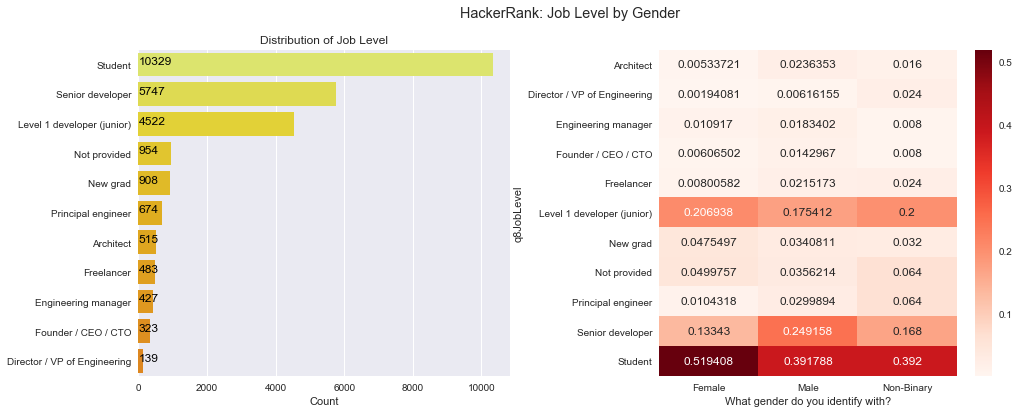

In [282]:
# Job Level

print('Q:',codebook.loc['q8JobLevel']['question'],"\n")

f,ax = plt.subplots(1,2,figsize=(16,6))
job = values['q8JobLevel'].value_counts()
sns.barplot(job.values, job.index, palette='Wistia',ax=ax[0])
ax[0].set_xlabel('Count')
ax[0].set_title('Distribution of Job Level')
for i, v in enumerate(job.values):
    ax[0].text(0.8,i,v,color='k',fontsize=12)
    
   
sns.set()
draw_heatmap('q8JobLevel', 'q3Gender', ax=ax[1], annot=True)
plt.subplots_adjust(wspace=0.4);


plt.suptitle("HackerRank: Job Level by Gender")
fig.tight_layout() 

plt.savefig('HR_joblevel_gender.jpg')

### Job Level, by Gender and Region

Q: Which of the following best matches your employment level? 



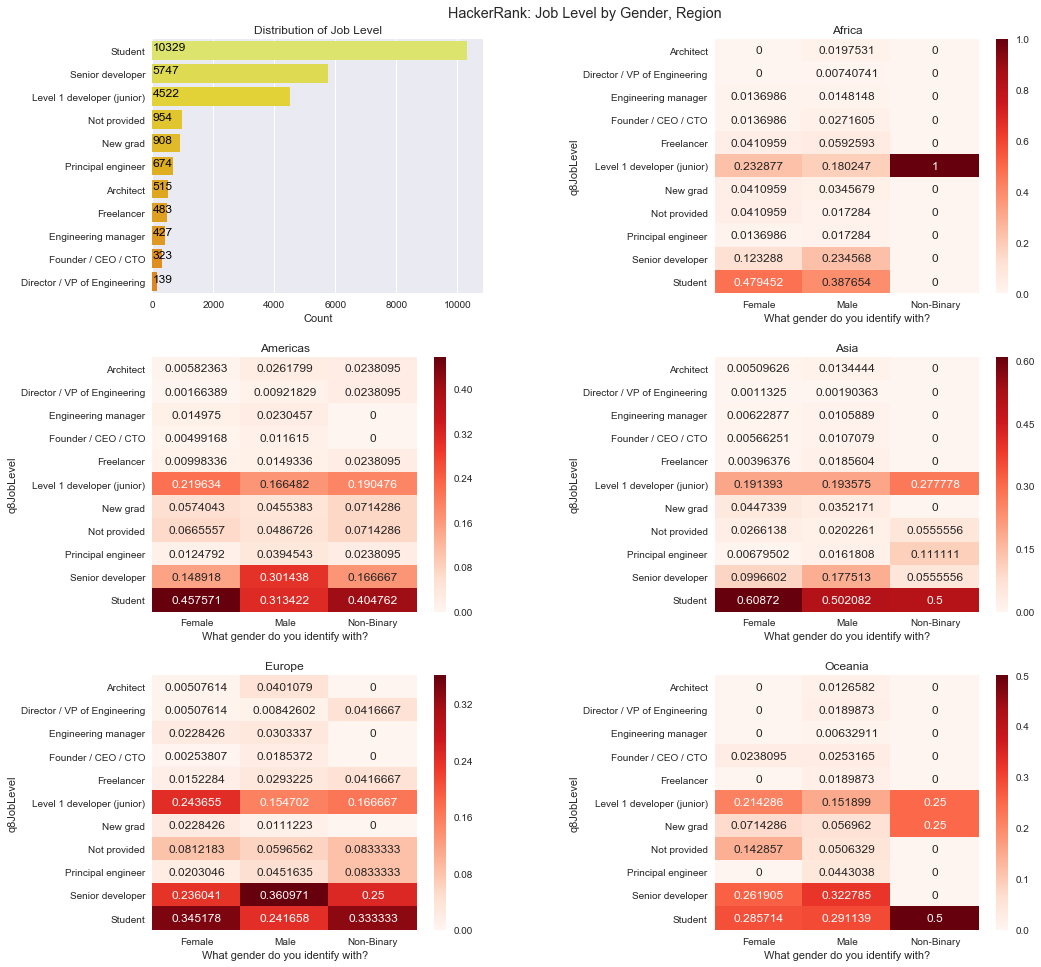

In [283]:
# Job Level

print('Q:',codebook.loc['q8JobLevel']['question'],"\n")

f,ax = plt.subplots(3,2,figsize=(16,15))
job = values['q8JobLevel'].value_counts()
sns.barplot(job.values, job.index, palette='Wistia',ax=ax[0][0])
ax[0][0].set_xlabel('Count')
ax[0][0].set_title('Distribution of Job Level')
for i, v in enumerate(job.values):
    ax[0][0].text(0.8,i,v,color='k',fontsize=12)
    
   
question = 'q8JobLevel'

sns.set()
draw_heatmap(question, 'q3Gender', ax=ax[0][1], annot=True, data=africa)
ax[0][1].set_title('Africa')

sns.set()
draw_heatmap(question, 'q3Gender', ax=ax[1][0], annot=True, data=americas)
ax[1][0].set_title('Americas')

sns.set()
draw_heatmap(question, 'q3Gender', ax=ax[1][1], annot=True, data=asia)
ax[1][1].set_title('Asia')

sns.set()
draw_heatmap(question, 'q3Gender', ax=ax[2][0], annot=True, data=europe)
ax[2][0].set_title('Europe')

sns.set()
draw_heatmap(question, 'q3Gender', ax=ax[2][1], annot=True, data=oceania)
ax[2][1].set_title('Oceania')


plt.subplots_adjust(hspace=0.25, wspace=0.7, top=0.95)


plt.suptitle("HackerRank: Job Level by Gender, Region")
fig.tight_layout() 

plt.savefig('HR_joblevel_gender_region.jpg')



### Job Level, by Gender, for 4 Countries

Q: Which of the following best matches your employment level? 



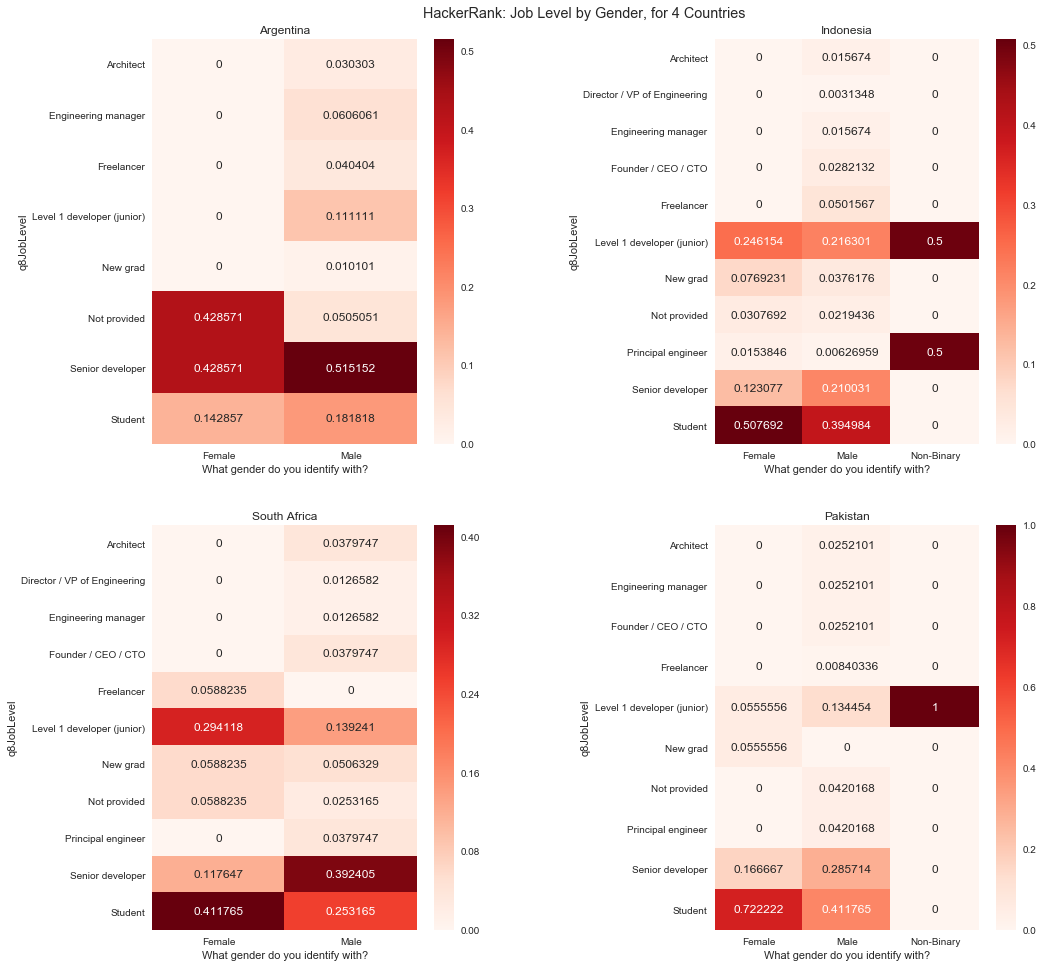

In [284]:
# Job Level

print('Q:',codebook.loc['q8JobLevel']['question'], "\n")

f,ax = plt.subplots(2,2,figsize=(16,15))

question = 'q8JobLevel'

sns.set()
draw_heatmap(question, 'q3Gender', ax=ax[0][0], annot=True, data=argentina)
ax[0][0].set_title('Argentina')

sns.set()
draw_heatmap(question, 'q3Gender', ax=ax[0][1], annot=True, data=indonesia)
ax[0][1].set_title('Indonesia')

sns.set()
draw_heatmap(question, 'q3Gender', ax=ax[1][0], annot=True, data=south_africa)
ax[1][0].set_title('South Africa')

sns.set()
draw_heatmap(question, 'q3Gender', ax=ax[1][1], annot=True, data=pakistan)
ax[1][1].set_title('Pakistan')


plt.subplots_adjust(hspace=0.2, wspace=0.7, top=0.95)


plt.suptitle("HackerRank: Job Level by Gender, for 4 Countries")

plt.savefig('HR_joblevel_gender_4countries.jpg')

### Map of Percent Senior Developers, by Gender

In [285]:
# Share of female senior developers by country

senior_dev = only_names[only_names['q8JobLevel'] == 'Senior developer']

female = senior_dev[senior_dev['q3Gender'] == 'Female']['CountryName'].value_counts()
male = senior_dev[senior_dev['q3Gender'] == 'Male']['CountryName'].value_counts()

country_share = (female/(female+male)).dropna()

# plotly 
data = [dict(
    type ='choropleth',
    locations = country_share.index,
    locationmode ='country names',
    z = country_share.values,
    text = '% female',
    colorscale=[[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
    reversescale=True,
    marker=dict(line=dict(color='rgb(180,180,180)', width=0.5)),
    colorbar = dict(title ='Response count')
    )]
layout = dict(title = 'HackerRank: Percent of Female Senior Developers',
             geo = dict( showframe= False,
                       showcoastlines=True,
                       projection = dict(type = 'Mercator')))
fig = dict(data=data, layout=layout)
offline.plot(fig, filename= "HR_female_percent_senior.html", image_filename="HR_female_percent_senior",image='png')
print("Open this map: HR_female_percent_senior.png")

Open this map: HR_female_percent_senior.png


## Hiring Managers

### Hiring Managers, by Gender

Q?: Do you interview people as part of your company's hiring process?


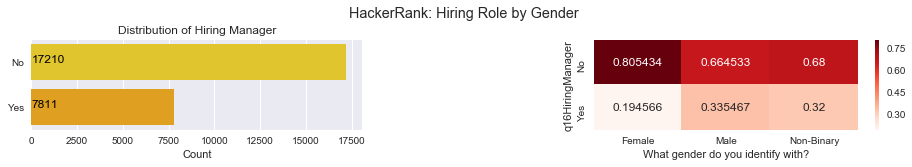

In [286]:
# Hiring Managers

print('Q?:',codebook.loc['q16HiringManager']['question'])

f,ax = plt.subplots(1,2,figsize=(16,2))
hm = values['q16HiringManager'].value_counts()
sns.barplot(hm.values, hm.index, palette='Wistia',ax=ax[0])
ax[0].set_title('Distribution of Hiring Manager')
ax[0].set_xlabel('Count')

for i, v in enumerate(hm.values):
    ax[0].text(0.8,i,v,color='k',fontsize=12)
    
 
sns.set()
draw_heatmap('q16HiringManager', 'q3Gender', ax=ax[1], annot=True)
plt.subplots_adjust(wspace=0.7, top=0.75)


plt.suptitle("HackerRank: Hiring Role by Gender")

plt.savefig('HR_hiring_gender.jpg')

### Hiring Managers, by Gender and Region

Q: Do you interview people as part of your company's hiring process? 



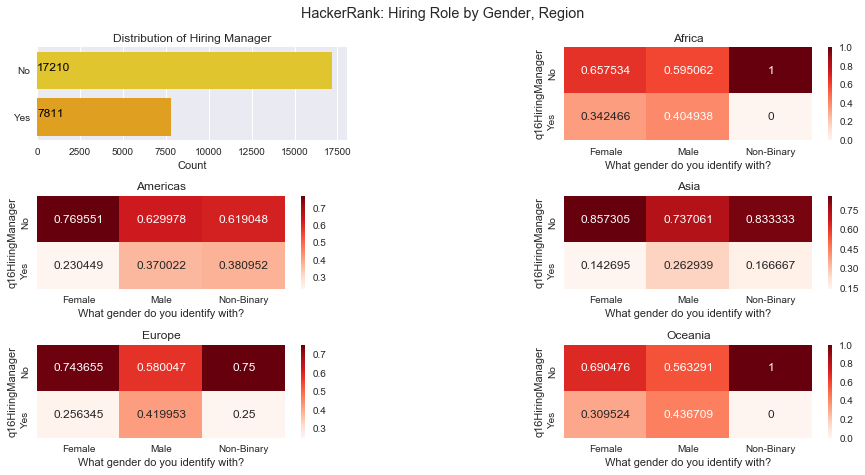

In [287]:
# Hiring Managers by region

print('Q:',codebook.loc['q16HiringManager']['question'], "\n")

f,ax = plt.subplots(3,2,figsize=(15,7))
hm = values['q16HiringManager'].value_counts()
sns.barplot(hm.values, hm.index, palette='Wistia',ax=ax[0][0])
ax[0][0].set_title('Distribution of Hiring Manager')
ax[0][0].set_xlabel('Count')

for i, v in enumerate(hm.values):
    ax[0][0].text(0.8,i,v,color='k',fontsize=12)
    
question = 'q16HiringManager'

sns.set()
draw_heatmap(question, 'q3Gender', ax=ax[0][1], annot=True, data=africa)
ax[0][1].set_title('Africa')

sns.set()
draw_heatmap(question, 'q3Gender', ax=ax[1][0], annot=True, data=americas)
ax[1][0].set_title('Americas')

sns.set()
draw_heatmap(question, 'q3Gender', ax=ax[1][1], annot=True, data=asia)
ax[1][1].set_title('Asia')

sns.set()
draw_heatmap(question, 'q3Gender', ax=ax[2][0], annot=True, data=europe)
ax[2][0].set_title('Europe')

sns.set()
draw_heatmap(question, 'q3Gender', ax=ax[2][1], annot=True, data=oceania)
ax[2][1].set_title('Oceania')

plt.subplots_adjust(hspace=0.6, wspace=0.7, top=0.90)


plt.suptitle("HackerRank: Hiring Role by Gender, Region")

plt.savefig('HR_hiring_gender_region.jpg')


### Hiring Managers, by Gender, for 4 Countries

Q: Do you interview people as part of your company's hiring process? 



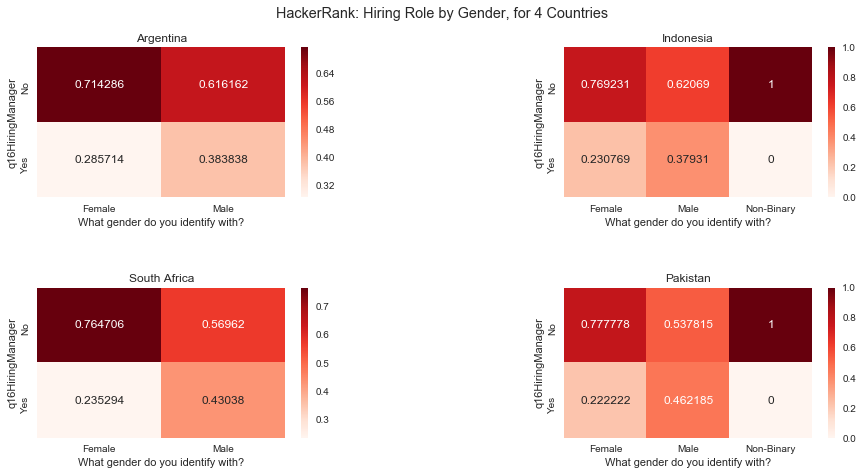

In [288]:
# Hiring Managers

print('Q:',codebook.loc['q16HiringManager']['question'], "\n")

f,ax = plt.subplots(2,2,figsize=(15,7))



question = 'q16HiringManager'

sns.set()
draw_heatmap(question, 'q3Gender', ax=ax[0][0], annot=True, data=argentina)
ax[0][0].set_title('Argentina')

sns.set()
draw_heatmap(question, 'q3Gender', ax=ax[0][1], annot=True, data=indonesia)
ax[0][1].set_title('Indonesia')

sns.set()
draw_heatmap(question, 'q3Gender', ax=ax[1][0], annot=True, data=south_africa)
ax[1][0].set_title('South Africa')

sns.set()
draw_heatmap(question, 'q3Gender', ax=ax[1][1], annot=True, data=pakistan)
ax[1][1].set_title('Pakistan')


plt.subplots_adjust(hspace=0.6, wspace=0.7, top=0.90)


plt.suptitle("HackerRank: Hiring Role by Gender, for 4 Countries")

plt.savefig('HR_hiring_gender_4countries.jpg')

### Map of Percent Hiring Managers, by Gender

In [289]:
# Map of share of female hiring managers 


hiring_managers = only_names[only_names['q16HiringManager'] == 'Yes']

female = hiring_managers[hiring_managers['q3Gender'] == 'Female']['CountryName'].value_counts()
male = hiring_managers[hiring_managers['q3Gender'] == 'Male']['CountryName'].value_counts()

country_share = (female/(female+male)).dropna()

# plotly 
data = [dict(
    type ='choropleth',
    locations = country_share.index,
    locationmode ='country names',
    z = country_share.values,
    text = '% female',
    colorscale=[[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
    reversescale=True,
    marker=dict(line=dict(color='rgb(180,180,180)', width=0.5)),
    colorbar = dict(title ='Response count')
    )]
layout = dict(title = 'HackerRank: Percent of Female Hiring Managers',
             geo = dict( showframe= False,
                       showcoastlines=True,
                       projection = dict(type = 'Mercator')))
fig = dict(data=data, layout=layout)

offline.plot(fig, filename= "HR_female_percent_hiring.html", image_filename="HR_female_percent_hiring",image='png')
print("Open this map: HR_female_percent_hiring.png")


Open this map: HR_female_percent_hiring.png
